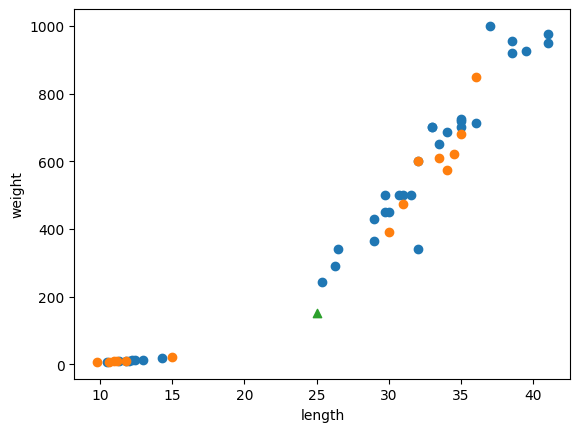

array([0])

In [5]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)
kn.predict(test_input)

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(test_input[:,0], test_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
kn.predict([[25,150]])

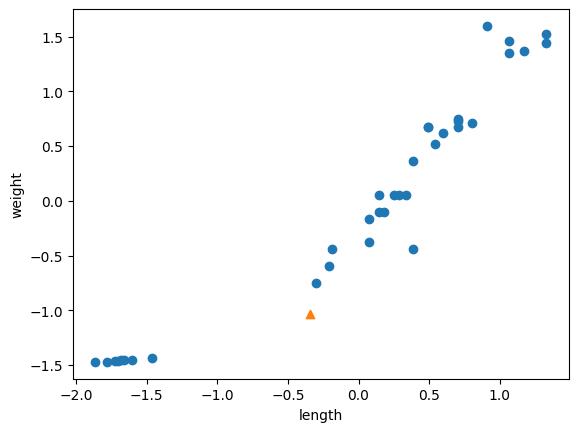

[1]


In [9]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
new =([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

test_scaled = (test_input - mean) / std

kn = kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)
print(kn.predict([new]))